In [13]:
# Intern allows us to access boss resources https://docs.theboss.io/docs/getting-started-intern
# You do not need to modify this cell, it will connect to the bossdb for you. 
from intern.remote.boss import BossRemote
from intern.resource.boss.resource import *
import numpy as np
import configparser
import matplotlib.pyplot as plt

# Setup and connection parameters
connection_params={
    'protocol':'https',
    'host':'api.bossdb.io',
    'token':'public' #allows read access to the general public
}

# Dataset dimensions are z:[0,720], y:[0,1420], x:[0,5805]
# Data beyond these ranges will be padded with 0 values
#BossDB access uses an [inclusive_index,exclusive_index] format, so [0,10] specifies 10 index values 0-9
data_params={
    'prasad_coll':'prasad',
    'prasad_exp' : 'prasad2020',
    'prasad_channel' : 'image',
    'prasad_coord' : 'prasad_prasad2020',
    'prasad_res' : 0, #Native resolution of dataset is 1.17um, 1.17um, 1.17um per voxel
}

rmt = BossRemote(connection_params)

raw_chan_setup = ChannelResource(
        data_params['prasad_channel'], data_params['prasad_coll'], data_params['prasad_exp'], 
        type='image', datatype='uint8')
raw_chan_actual = rmt.get_project(raw_chan_setup)

In [14]:
#Change the xrange, yrange, zrange to get the data you need. Valid dimensions are 
#z:[0,720], y:[0,1420], x:[0,5805]
xrange = [1100,1400]
yrange = [300,600]
zrange =[300,500]
# Get the Raw Data from bossDB
raw_cutout_data = rmt.get_cutout(raw_chan_actual, data_params['prasad_res'], xrange, yrange, zrange)

(200, 300, 300)


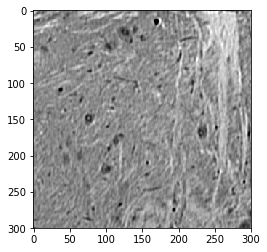

In [15]:
print(raw_cutout_data.shape)
#Change the index 0 to see other z slices
plt.imshow(np.squeeze(raw_cutout_data[0,:,:]),cmap='gray')

In [18]:
#save as numpy
#data is unsigned, 8 bit integers (uint8)
#Data is save in ZYX format
filename = 'example_cutout_z'+str(zrange[0])+'_'+str(zrange[1]) \
    +'_y'+str(yrange[0])+'_'+str(yrange[1]) \
    + '_x'+ str(xrange[0])+'_'+str(xrange[1]) + '.npy'
np.save(filename,raw_cutout_data)

In [19]:
#save as hdf5 file
#data is unsigned, 8 bit integers (uint8)
#Data is save in ZYX format
import h5py
filename = 'example_cutout_z'+str(zrange[0])+'_'+str(zrange[1]) \
    +'_y'+str(yrange[0])+'_'+str(yrange[1]) \
    + '_x'+ str(xrange[0])+'_'+str(xrange[1]) + '.hdf5'
hdf5file = h5py.File(filename,'w')
dset = hdf5file.create_dataset("raw_data", data=raw_cutout_data)
hdf5file.close()

In [20]:
#save as tiff image file
#data is unsigned, 8 bit integers (uint8)
#Data is save in ZYX format
from tifffile import imsave
filename = 'example_cutout_z'+str(zrange[0])+'_'+str(zrange[1]) \
    +'_y'+str(yrange[0])+'_'+str(yrange[1]) \
    + '_x'+ str(xrange[0])+'_'+str(xrange[1]) + '.tiff'
imsave(filename, raw_cutout_data)